In [2]:
%matplotlib inline

In [69]:
import matplotlib.pyplot as plt
import numpy as np

Chicago tax rates: http://www.chicagotribune.com/ct-compare-your-property-tax-rate-database-20151111-htmlstory.html

In [76]:
class own_home:
    def __init__(self, value, down, interest, term, tax_rate, 
                 maintenance_rate, insurance_rate, HOA_fees):
        
        if type(down) == float:
            down = down * value
        
        self.P = value - down
        
        self.value = value
        self.down = down
            
        self.N = term * 12
        self.i = interest/12
        
        self.mortgage_payment = self.calculate_mortgage_payment()
        
        self.monthly_tax = tax_rate * value / 12
        self.monthly_insurance = insurance_rate * value / 12
        self.monthly_upkeep = maintenance_rate * value / 12
        self.monthly_hoa = HOA_fees
        
        self.total_monthly = self.calculate_monthly_cost()
        
        self.total_cost = self.total_monthly * self.N + down
        
    def calculate_mortgage_payment(self):
        
        m_payment = self.i * (self.P*(1+self.i)**self.N)/( (1+self.i)**self.N - 1)
        
        return m_payment
    
    def calculate_monthly_cost(self):
        
        total = sum([self.mortgage_payment, self.monthly_tax, self.monthly_insurance,
                   self.monthly_upkeep, self.monthly_hoa])
        
        return total
        
    def __str__(self):
        
        fmt = '{0:30} $ {1:,.2f}'
        long_string = [
            'Monthly Breakdown',
            '-'*50,
            fmt.format('Mortgage Payment', o.mortgage_payment),
            fmt.format('Property Taxes', o.monthly_tax),
            fmt.format('Insurance', o.monthly_insurance),
            fmt.format('Maintenance Cost', o.monthly_upkeep),
            fmt.format('HOA Fees', o.monthly_hoa),
            "",
            fmt.format('Total Monthly Payment', self.total_monthly),
            "",
            "Total Costs",
            "-"*50,
            fmt.format('Total Cost of Home', self.total_cost),
            fmt.format('Total Cost minus Value', self.total_cost - self.value)
        ]

        return '\n'.join(long_string)
    
    def compare_with_rental(self, monthly_rent):
        
        print(self)
        
        rental_cost = monthly_rent * self.N
        print('\n')
        print('Comparison with Renting')
        print('-'*50)
        print('{0:30} $ {1:,.2f}'.format("Comparable Monthly Rent", monthly_rent))
        print('{0:30} $ {1:,.2f}'.format("Total Cost of Rental", rental_cost))
        # total savings
        print('{0:30} $ {1:,.2f}'.format("Savings over Renting", rental_cost - self.total_cost + self.value))
        
    def create_burndown(self):
        
        P = [self.P]
        I = [0]
        princ_contribution = [0]
        
        for i in range(self.N):
            interest = self.i * P[i]
            amt_to_principal = self.mortgage_payment - interest         
            P.append(P[i]-amt_to_principal)
            I.append(interest)
            princ_contribution.append(amt_to_principal)
            
        return princ_contribution, I
        
        
def inverse_payment_calculator(payment, 
                               down=.20, 
                               interest=0.04, 
                               term=30, 
                               tax_rate=0.02, 
                               maintenance_rate=0.01, 
                               insurance_rate=0.0035, 
                               HOA_fees=0):
    i = interest/12
    N = term * 12
    
    numerator = payment - HOA_fees
    denom = i*(1-down)*(1+i)**N/((1+i)**N - 1) + (tax_rate + insurance_rate + maintenance_rate)/12
    
    return numerator/denom
        

In [77]:
o = own_home(value=475000, 
             down=.20, 
             interest=0.035, 
             term=15, 
             tax_rate=0.02, 
             maintenance_rate=0.01, 
             insurance_rate=0.0035, 
             HOA_fees=0)

print(o)

Monthly Breakdown
--------------------------------------------------
Mortgage Payment               $ 2,716.55
Property Taxes                 $ 791.67
Insurance                      $ 138.54
Maintenance Cost               $ 395.83
HOA Fees                       $ 0.00

Total Monthly Payment          $ 4,042.60

Total Costs
--------------------------------------------------
Total Cost of Home             $ 822,667.16
Total Cost minus Value         $ 347,667.16


In [78]:
o.compare_with_rental(2000)

Monthly Breakdown
--------------------------------------------------
Mortgage Payment               $ 2,716.55
Property Taxes                 $ 791.67
Insurance                      $ 138.54
Maintenance Cost               $ 395.83
HOA Fees                       $ 0.00

Total Monthly Payment          $ 4,042.60

Total Costs
--------------------------------------------------
Total Cost of Home             $ 822,667.16
Total Cost minus Value         $ 347,667.16


Comparison with Renting
--------------------------------------------------
Comparable Monthly Rent        $ 2,000.00
Total Cost of Rental           $ 360,000.00
Savings over Renting           $ 12,332.84


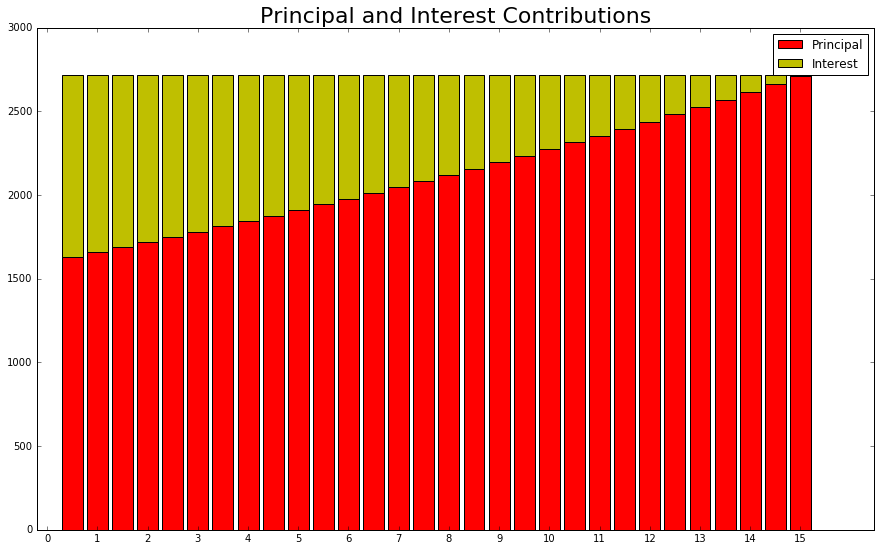

In [79]:
fig, ax = plt.subplots(figsize=(15, 9))

ind = range(o.N + 1)[::6]
width=5

p1 = ax.bar(ind, o.create_burndown()[0][::6], width, color='r')
p2 = ax.bar(ind, o.create_burndown()[1][::6], width, color='y',
             bottom=o.create_burndown()[0][::6])

# plt.ylabel('Scores')
plt.title('Principal and Interest Contributions', size=22)
plt.xticks([x + width/2 for x in ind][::2], [int(x/12) for x in ind][::2])
plt.legend((p1[0], p2[0]), ('Principal', 'Interest'))

plt.show()

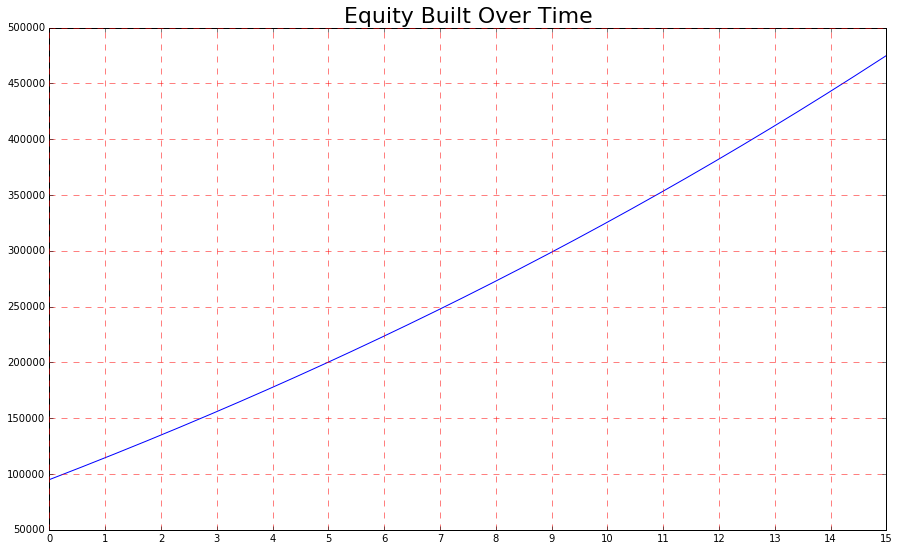

In [81]:
fig, ax = plt.subplots(figsize=(15, 9))

ind = range(o.N + 1)


p1 = ax.plot(ind, o.down + np.cumsum(o.create_burndown()[0]))
plt.xticks(ind[::12], [int(x/12) for x in ind][::12])
ax.grid(b=True, which='major', color='r', linestyle='--')
plt.title('Equity Built Over Time', size=22)


plt.show()

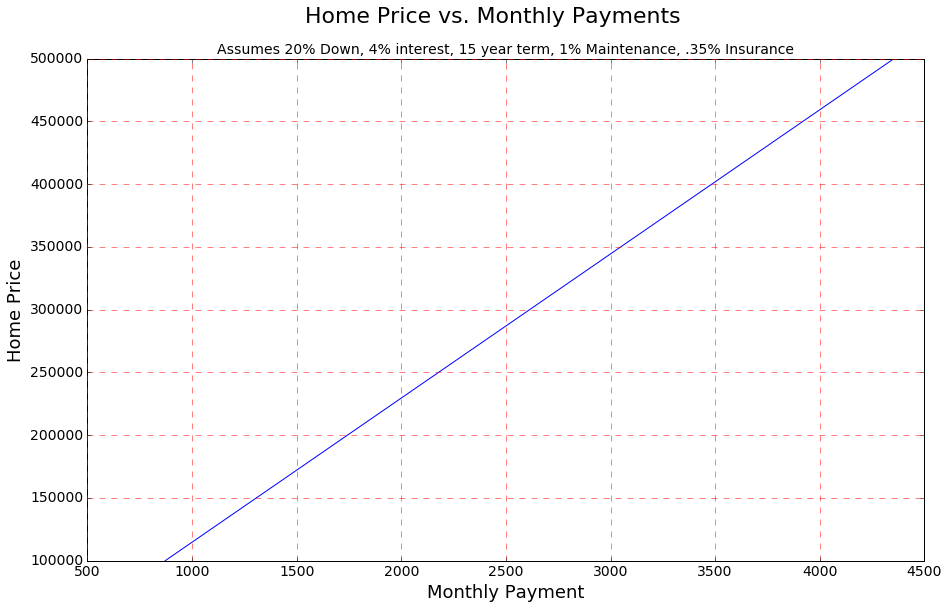

In [7]:
home_values = [1000 * x for x in range(100,500)]
payments = [own_home(value=x, 
             down=.20, 
             interest=0.04, 
             term=15, 
             tax_rate=0.02, 
             maintenance_rate=0.01, 
             insurance_rate=0.0035, 
             HOA_fees=0).total_monthly for x in home_values]

fig, ax = plt.subplots(figsize=(15, 9))

ax.plot(payments, home_values)

ax.grid(b=True, which='major', color='r', linestyle='--')

ax.set_ylabel('Home Price', fontsize=18)

ax.set_xlabel('Monthly Payment', fontsize=18)

plt.suptitle('Home Price vs. Monthly Payments', fontsize=22)
plt.title('Assumes 20% Down, 4% interest, 15 year term, 1% Maintenance, .35% Insurance', fontsize=14)

ax.tick_params(labelsize=14)

plt.show()

## Naive View: Some percentage of your salary goes to Housing

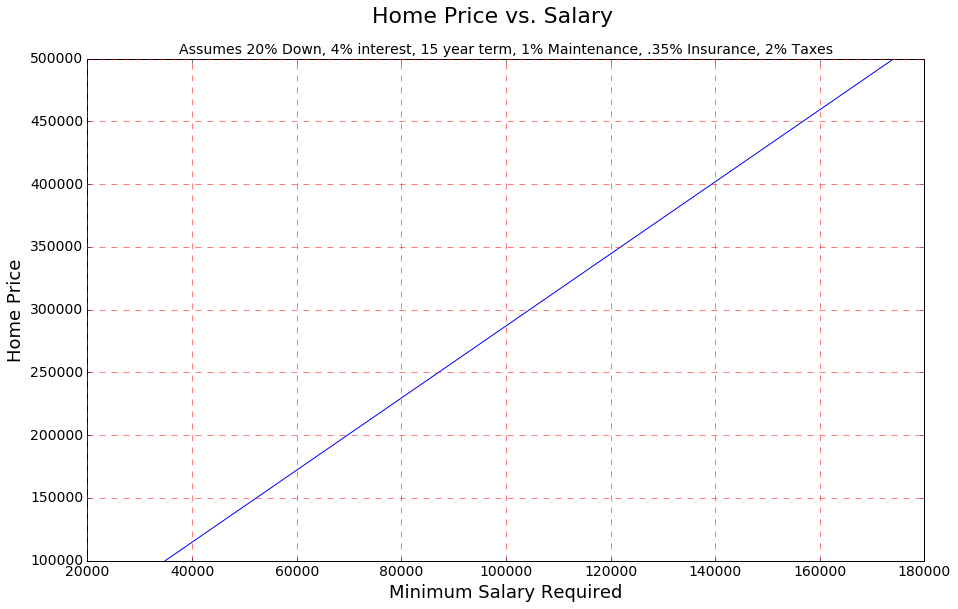

In [8]:
pct_to_housing = .3 # should be between 1/5 and 1/3, loosely


home_values = [1000 * x for x in range(100,500)]
salaries = [own_home(value=x, 
             down=.20, 
             interest=0.04, 
             term=15, 
             tax_rate=0.02, 
             maintenance_rate=0.01, 
             insurance_rate=0.0035, 
             HOA_fees=0).total_monthly / pct_to_housing * 12 for x in home_values]


fig, ax = plt.subplots(figsize=(15, 9))

ax.plot(salaries, home_values)

ax.grid(b=True, which='major', color='r', linestyle='--')

ax.set_ylabel('Home Price', fontsize=18)

ax.set_xlabel('Minimum Salary Required', fontsize=18)

plt.suptitle('Home Price vs. Salary', fontsize=22)
plt.title('Assumes 20% Down, 4% interest, 15 year term, 1% Maintenance, .35% Insurance, 2% Taxes', fontsize=14)

ax.tick_params(labelsize=14)

plt.show()

## More Realistic: The wealthier you are the more you can put towards housing

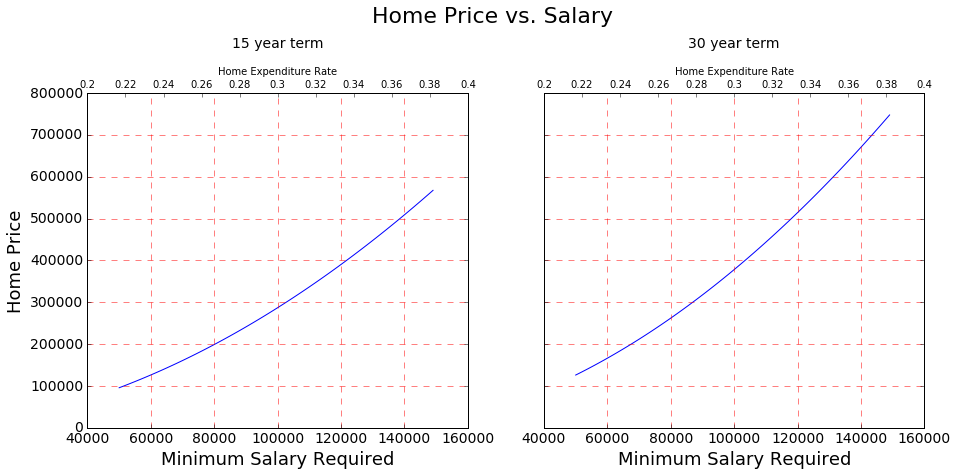

In [9]:
def norm(x, lower, upper):
    # normalize a number between .2 and .4
    return (x-lower)/(upper-lower) * (.4 - .2) + .2


salaries = [x*1000 for x in range(50, 150)]
payment_amt = [x * norm(x, 50000, 150000) / 12 for x in salaries]
home_values = [inverse_payment_calculator(payment=x, 
                                          down=.20, 
                                          interest=0.04,
                                          term=15,
                                          tax_rate=0.02,
                                          maintenance_rate=0.01,
                                          insurance_rate=0.0035,
                                          HOA_fees=0) for x in payment_amt]


fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

plt.suptitle('Home Price vs. Salary', fontsize=22, y=1.1)

ax1.plot(salaries, home_values)
ax1.grid(b=True, which='major', color='r', linestyle='--')
ax1.set_ylabel('Home Price', fontsize=18)
ax1.set_xlabel('Minimum Salary Required', fontsize=18)
ax1.set_title('15 year term', fontsize=14, y=1.12)
ax2 = ax1.twiny()
ax2.set_xticks([x/10 for x in range(11)])
ticks = [norm(x, 50000, 150000) for x in salaries]
ax2.set_xticklabels([round(x, 2) for x in ticks[::10] + [ticks[-1]]])
ax2.set_xlabel("Home Expenditure Rate")
ax1.tick_params(labelsize=14)

salaries = [x*1000 for x in range(50, 150)]
payment_amt = [x * norm(x, 50000, 150000) / 12 for x in salaries]
home_values = [inverse_payment_calculator(payment=x, 
                                          down=.20, 
                                          interest=0.04,
                                          term=30,
                                          tax_rate=0.02,
                                          maintenance_rate=0.01,
                                          insurance_rate=0.0035,
                                          HOA_fees=0) for x in payment_amt]

ax3.plot(salaries, home_values)
ax3.grid(b=True, which='major', color='r', linestyle='--')
# ax3.set_ylabel('Home Price', fontsize=18)
ax3.set_xlabel('Minimum Salary Required', fontsize=18)
ax3.set_title('30 year term', fontsize=14, y=1.12)
ax4 = ax3.twiny()
ax4.set_xticks([x/10 for x in range(11)])
ticks = [norm(x, 50000, 150000) for x in salaries]
ax4.set_xticklabels([round(x, 2) for x in ticks[::10] + [ticks[-1]]])
ax4.set_xlabel("Home Expenditure Rate")
ax3.tick_params(labelsize=14)

plt.show()

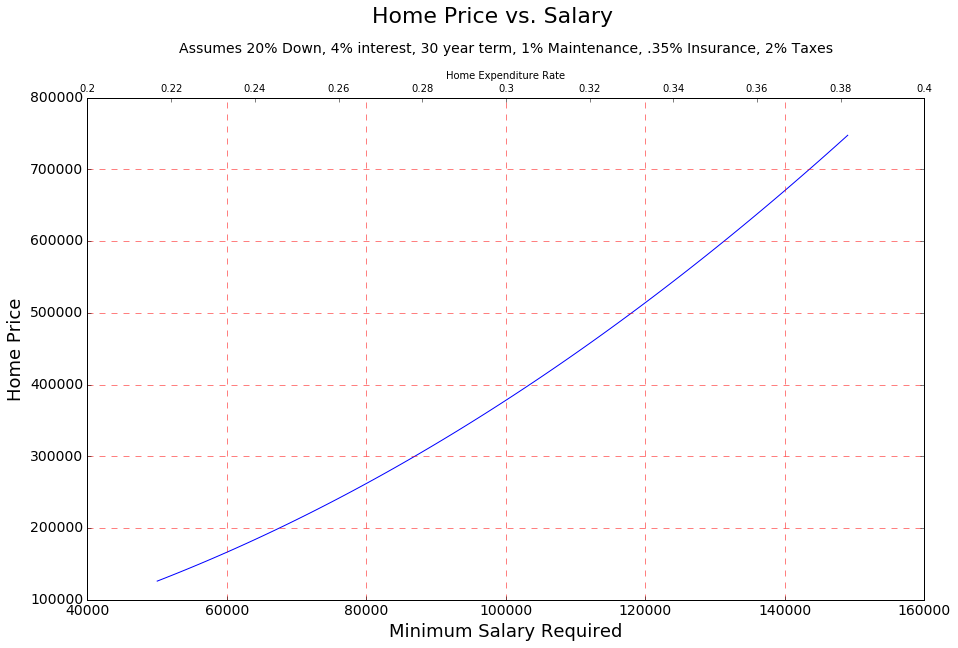

In [10]:
def norm(x, lower, upper):
    # normalize a number between .2 and .4
    return (x-lower)/(upper-lower) * (.4 - .2) + .2


salaries = [x*1000 for x in range(50, 150)]
payment_amt = [x * norm(x, 50000, 150000) / 12 for x in salaries]
home_values = [inverse_payment_calculator(payment=x, 
                                          down=.20, 
                                          interest=0.04,
                                          term=30,
                                          tax_rate=0.02,
                                          maintenance_rate=0.01,
                                          insurance_rate=0.0035,
                                          HOA_fees=0) for x in payment_amt]


fig, ax = plt.subplots(figsize=(15, 9))

ax.plot(salaries, home_values)

ax.grid(b=True, which='major', color='r', linestyle='--')

ax.set_ylabel('Home Price', fontsize=18)

ax.set_xlabel('Minimum Salary Required', fontsize=18)

plt.suptitle('Home Price vs. Salary', fontsize=22, y=1.04)
plt.title('Assumes 20% Down, 4% interest, 30 year term, 1% Maintenance, .35% Insurance, 2% Taxes', fontsize=14, y=1.08)

ax2 = ax.twiny()
ax2.set_xticks([x/10 for x in range(11)])
ticks = [norm(x, 50000, 150000) for x in salaries]
ax2.set_xticklabels([round(x, 2) for x in ticks[::10] + [ticks[-1]]])
ax2.set_xlabel("Home Expenditure Rate")

ax.tick_params(labelsize=14)

plt.show()

In [24]:
o = own_home(value=300000, 
             down=.20, 
             interest=0.03, 
             term=15, 
             tax_rate=0.02, 
             maintenance_rate=0.01, 
             insurance_rate=0.0035, 
             HOA_fees=0)
o.total_monthly
o.mortgage_payment

1657.3959366672043

In [22]:
o = own_home(value=300000, 
             down=.20, 
             interest=0.04, 
             term=30, 
             tax_rate=0.02, 
             maintenance_rate=0.01, 
             insurance_rate=0.0035, 
             HOA_fees=0)
o.total_monthly

1983.2967091170892

In [19]:
sum([(700*12) * (1.03)**x for x in range(1,31)]) # 30 yrs investment income

411622.4966910984

In [20]:
sum([(1700*12) * (1.03)**x for x in range(1,16)]) # 15 yrs investment income

390800.37858717557

# Limitations

* This doesn't include PMI
* This doesn't account for appreciation of Real Estate investment
* This doesn't account for refinancing or changes in the value of the home
* This doesn't account for the *opportunity cost* that the owner faces by having a higher monthly payment (they could invest the difference in the monthly payment to recoup some of the losses of renting)

In [133]:
o = own_home(value=300000, 
             down=.20, 
             interest=0.04, 
             term=30, 
             tax_rate=0.02, 
             maintenance_rate=0.01, 
             insurance_rate=0.0035, 
             HOA_fees=0)

print(o)

Monthly Breakdown
--------------------------------------------------
Mortgage Payment               $ 1,145.80
Property Taxes                 $ 500.00
Insurance                      $ 87.50
Maintenance Cost               $ 250.00
HOA Fees                       $ 0.00

Total Monthly Payment          $ 1,983.30

Total Costs
--------------------------------------------------
Total Cost of Home             $ 773,986.82
Total Cost minus Value         $ 473,986.82
